In [3]:
from langgraph.graph import StateGraph,START,END
from langchain_mistralai import ChatMistralAI
from typing import TypedDict
from dotenv import load_dotenv
import os

load_dotenv()

True

In [4]:
#state
class LLM(TypedDict):

    question:str
    answer:str

In [5]:
llm=ChatMistralAI(api_key=os.getenv("mistral_ai"))

In [6]:
#make nodes and then edges to connect them after defining ur graph
 
graph=StateGraph(LLM)

In [7]:
def llm_qa(state:LLM)->LLM:
    question=state['question']
    prompt=f"answer the following {question}"
    response=llm.invoke(prompt).content
    state['answer']=response
    return state

In [8]:
graph.add_node("LLM_ll",llm_qa)

graph.add_edge(START,"LLM_ll")
graph.add_edge("LLM_ll",END)

workflow=graph.compile()


In [9]:
initial_state={"question":"what is the capital of India?"}

workflow.invoke(initial_state)

{'question': 'what is the capital of India?',
 'answer': 'The capital of India is actually divided into two cities: New Delhi (the administrative capital) and Mumbai (the financial capital), although New Delhi is more commonly referred to as the capital. It is located in the northern part of the country and has been the capital since 1911, when it was moved from Calcutta. New Delhi is known for its rich history, diverse culture, and many landmarks, including the Red Fort, India Gate, and the Parliament House.'}

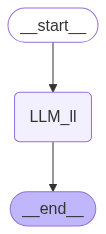

In [10]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())